# Project 5: Application - Twitter data #
## Part 5: Nonlinear regressions ##
### Question 8&9 Ensemble methods for the whole dataset ###

In [1]:
# NOTE: http://pytz.sourceforge.net/
import pytz
# NOTE: https://www.w3schools.com/python/python_json.asp
import json
# NOTE: https://docs.python.org/3/library/datetime.html
import datetime
import numpy as np
import pandas as pd
import os
os.chdir("ECE219_tweet_data/")

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

cv_n_jobs = -1

In [2]:
# load files and report for Part 3
# NOTE: https://www.statsmodels.org/stable/index.html
from sklearn.metrics import r2_score, mean_squared_error

def readfile_p5_20(file_name):
    # Read file ##########################################################
    time_list = []
    num_retweets = []
    num_followers = []
    num_replies = []
    num_impressions = []
    num_favourites = []
    rank_score = []
    count_hashtag = []
    mention_counts = []
    url_counts = []
    author_name = []
    with open(file_name,encoding='utf8') as file:
        data = file.readlines()
    for line in data:
        json_object = json.loads(line)
        time_list.append(json_object['citation_date'])
        num_retweets.append(json_object['metrics']['citations']['total'])
        num_followers.append(json_object['author']['followers'])
        # addtional features: 
        #   impressions, favourites, ranking score, counted hashtag, 
        #   mentioned count, url counts, author_name
        num_replies.append(json_object['metrics']['citations']['replies'])
        num_impressions.append(json_object['metrics']['impressions'])
        num_favourites.append(json_object['tweet']['favorite_count'])
        rank_score.append(json_object['metrics']['ranking_score'])
        count_hashtag.append(json_object['title'].count('#'))
        mention_counts.append(len(json_object['tweet']['entities']['user_mentions']))
        url_counts.append(len(json_object['tweet']['entities']['urls']))
        author_name.append(json_object['author']['name'])
    file.close()

    # Process datetime for event counting #################################
    # NOTE: https://stackoverflow.com/questions/28564254/count-number-of-events-per-hour-given-in-datetime-numpy
    date_list = []
    pst_tz = pytz.timezone('America/Los_Angeles')
    for time in time_list:
        date = datetime.datetime.fromtimestamp(time,pst_tz).replace(tzinfo=None)
        date_list.append(date)
    # count events per hour using dataframe
    date_df = pd.DataFrame(date_list,columns=['Date'])
    date_df = date_df.set_index(date_df['Date'])
    date_df.drop(['Date'],1,inplace = True)
    date_df['num_tweets'] = 1
    date_df['num_followers'] = num_followers
    date_df['num_retweets'] = num_retweets
    # additional features
    date_df['num_replies'] = num_replies
    date_df['num_impressions'] = num_impressions
    date_df['num_favourites'] = num_favourites
    date_df['rank_score'] = rank_score
    date_df['count_hashtag'] = count_hashtag
    date_df['mention_counts'] = mention_counts
    date_df['url_counts'] = url_counts
    date_df['author_name'] = author_name

    # NOTE: http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.apply.html
    # count events per feature
    # features: 
    #   total number of tweets, 
    #   total number of followers, max number of followers, 
    #   total number of retweets,
    #   total number of replies, max number of replies, 
    #   total number of impressions, max number of impressions,
    #   total number of favourites, max number of favourites,
    #   sum of rank scores, max rank scores,
    #   sum of counted hashtag, max counted hashtage
    #   sum of mentioned counts, max mentioned counts
    #   sum of url counts, max url counts
    #   total number of authors, max number of authors
    tot_num_tweets = date_df['num_tweets'].resample('H').sum()
    tot_num_followers = date_df['num_followers'].resample('H').sum()
    max_num_followers = date_df['num_followers'].resample('H').max()
    tot_num_retweets = date_df['num_retweets'].resample('H').sum()
    tot_num_replies = date_df['num_replies'].resample('H').sum()
    max_num_replies = date_df['num_replies'].resample('H').max()
    tot_num_impressions = date_df['num_impressions'].resample('H').sum()
    max_num_impressions = date_df['num_impressions'].resample('H').max()
    tot_num_favourites = date_df['num_favourites'].resample('H').sum()
    max_num_favourites = date_df['num_favourites'].resample('H').max()
    tot_rank_score = date_df['rank_score'].resample('H').sum()
    max_rank_score = date_df['rank_score'].resample('H').max()
    tot_count_hashtag = date_df['count_hashtag'].resample('H').sum()
    max_count_hashtag = date_df['count_hashtag'].resample('H').max()
    tot_mention_counts = date_df['mention_counts'].resample('H').sum()
    max_mention_counts = date_df['mention_counts'].resample('H').max()
    tot_url_counts = date_df['url_counts'].resample('H').sum()
    max_url_counts = date_df['url_counts'].resample('H').max()
    tot_author_name = date_df['author_name'].resample('H').apply(lambda x: len(x.unique()))
    # rename each feature
    tot_num_tweets.rename('tot_num_tweets',inplace=True)
    tot_num_followers.rename('tot_num_followers',inplace=True)
    max_num_followers.rename('max_num_followers',inplace=True)
    tot_num_retweets.rename('tot_num_retweets',inplace=True)
    tot_num_replies.rename('tot_num_replies',inplace=True)
    max_num_replies.rename('max_num_replies',inplace=True)
    tot_num_impressions.rename('tot_num_impressions',inplace=True)
    max_num_impressions.rename('max_num_impressions',inplace=True)
    tot_num_favourites.rename('tot_num_favourites',inplace=True)
    max_num_favourites.rename('max_num_favourites',inplace=True)
    tot_rank_score.rename('tot_rank_score',inplace=True)
    max_rank_score.rename('max_rank_score',inplace=True)
    tot_count_hashtag.rename('tot_count_hashtag',inplace=True)
    max_count_hashtag.rename('max_count_hashtag',inplace=True)
    tot_mention_counts.rename('tot_mention_counts',inplace=True)
    max_mention_counts.rename('max_mention_counts',inplace=True)
    tot_url_counts.rename('tot_url_counts',inplace=True)
    max_url_counts.rename('max_url_counts',inplace=True)
    tot_author_name.rename('tot_author_name',inplace=True)
    # NOTE: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
    # concatenating features
    features = [tot_num_tweets,
               tot_num_followers, max_num_followers,
               tot_num_retweets,
               tot_num_replies, max_num_replies,
               tot_num_impressions, max_num_impressions,
               tot_num_favourites, max_num_favourites,
               tot_rank_score, max_rank_score,
               tot_count_hashtag, max_count_hashtag,
               tot_mention_counts, max_mention_counts,
               tot_url_counts, max_url_counts,
               tot_author_name]
    date_df_out = pd.concat(features, axis=1)
    date_df_out['time'] = date_df_out.index.hour
    return date_df_out

In [3]:
def plotPred(test_target, pred_target):
    line1 = np.linspace(0,np.max([test_target,pred_target]),10)
    #plt.figure(figsize=(8,6)) 
    plt.scatter(test_target,pred_target)
    plt.plot(line1, line1,'r--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

In [4]:
# using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

# Set Parameters
parameters = {
'max_depth': [10, 20, 40, 60, 80, 100, 200, None],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

# parameters = {
# 'max_depth': [10, 20],
# 'max_features': ['auto'],
# 'min_samples_leaf': [1, 2],
# 'min_samples_split': [2],
# 'n_estimators': [200]
# }

#### Aggregate data ####

In [5]:
# 'tweets_#gohawks.txt'
df1 = readfile_p5_20('tweets_#gohawks.txt')
# 'tweets_#gohawks.txt'
df2 = readfile_p5_20('tweets_#gopatriots.txt')
# 'tweets_#gohawks.txt'
df3 = readfile_p5_20('tweets_#nfl.txt')
# 'tweets_#gohawks.txt'
df4 = readfile_p5_20('tweets_#patriots.txt')
# 'tweets_#gohawks.txt'
df5 = readfile_p5_20('tweets_#sb49.txt')
# 'tweets_#gohawks.txt'
df6 = readfile_p5_20('tweets_#superbowl.txt')
frames = [df1, df2, df3, df4, df5, df6]
date_df_out = pd.concat(frames)
# print(date_df_out)
# print(df1.shape)
# print(df2.shape)
# print(df3.shape)
# print(df4.shape)
# print(df5.shape)
# print(df6.shape)
# print(date_df_out.shape)
del df1,df2,df3,df4,df5,df6

#### Section 1. RandomForestRegressor ####

In [6]:
X = date_df_out.iloc[:-1]
y = date_df_out['tot_num_tweets'][1:]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

rfr = GridSearchCV(RandomForestRegressor(), parameters, n_jobs=cv_n_jobs, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error')
rfr.fit(X, y)
predictResult = rfr.predict(X)

Best MSE is:  -19732396.6569
Best Parameters are:  {'max_depth': 40, 'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1}


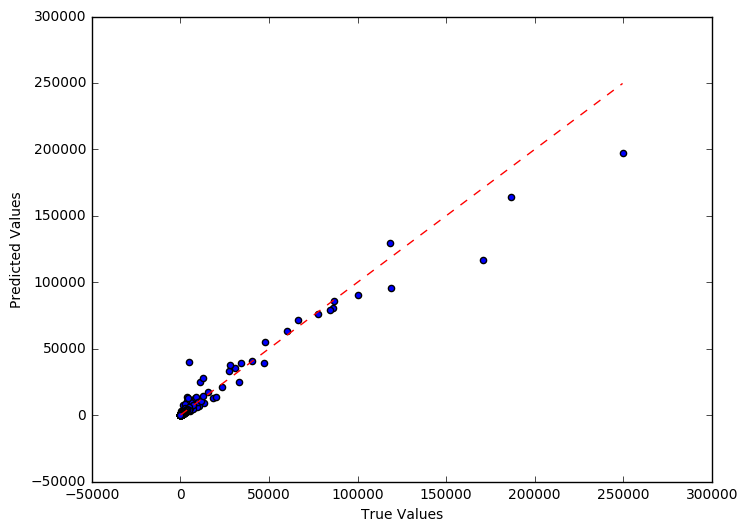

In [7]:
# Print result
# print(["%.6f" % x for x in rfr.cv_results_[r'mean_test_score']])
print('Best MSE is: ',rfr.best_score_ )
print('Best Parameters are: ',rfr.best_params_ )
plotPred(y,predictResult)

#### Section 2. GradientBoostingRegressor ####

#### Report of gohawks ####

In [8]:
X = date_df_out.iloc[:-1]
y = date_df_out['tot_num_tweets'][1:]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

gbr = GridSearchCV(GradientBoostingRegressor(), parameters, n_jobs=cv_n_jobs, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error')
gbr.fit(X, y)
predictResult = gbr.predict(X)


Best MSE is:  -14377869.84
Best Parameters are:  {'max_depth': 80, 'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 'auto', 'min_samples_leaf': 1}


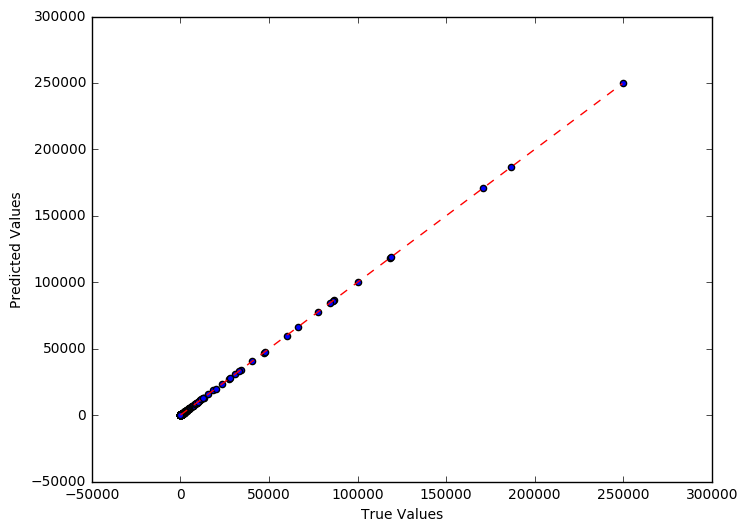

In [9]:
# Print result
# print(["%.6f" % x for x in gbr.cv_results_[r'mean_test_score']])
print('Best MSE is: ',gbr.best_score_ )
print('Best Parameters are: ',gbr.best_params_ )
plotPred(y,predictResult)

### Question 10 Ensemble methods for the time window ###

In [10]:
# load files and report for Part 3
# NOTE: https://www.statsmodels.org/stable/index.html
from sklearn.metrics import r2_score, mean_squared_error

def readfile_p5_20_win(file_name):
    # Read file ##########################################################
    time_list = []
    num_retweets = []
    num_followers = []
    num_replies = []
    num_impressions = []
    num_favourites = []
    rank_score = []
    count_hashtag = []
    mention_counts = []
    url_counts = []
    author_name = []
    with open(file_name,encoding='utf8') as file:
        data = file.readlines()
    for line in data:
        json_object = json.loads(line)
        time_list.append(json_object['citation_date'])
        num_retweets.append(json_object['metrics']['citations']['total'])
        num_followers.append(json_object['author']['followers'])
        # addtional features: 
        #   impressions, favourites, ranking score, counted hashtag, 
        #   mentioned count, url counts, author_name
        num_replies.append(json_object['metrics']['citations']['replies'])
        num_impressions.append(json_object['metrics']['impressions'])
        num_favourites.append(json_object['tweet']['favorite_count'])
        rank_score.append(json_object['metrics']['ranking_score'])
        count_hashtag.append(json_object['title'].count('#'))
        mention_counts.append(len(json_object['tweet']['entities']['user_mentions']))
        url_counts.append(len(json_object['tweet']['entities']['urls']))
        author_name.append(json_object['author']['name'])
    file.close()

    # Process datetime for event counting #################################
    # NOTE: https://stackoverflow.com/questions/28564254/count-number-of-events-per-hour-given-in-datetime-numpy
    date_list = []
    pst_tz = pytz.timezone('America/Los_Angeles')
    for time in time_list:
        date = datetime.datetime.fromtimestamp(time,pst_tz).replace(tzinfo=None)
        date_list.append(date)
    # count events per hour using dataframe
    date_df = pd.DataFrame(date_list,columns=['Date'])
    date_df = date_df.set_index(date_df['Date'])
    date_df.drop(['Date'],1,inplace = True)
    date_df['num_tweets'] = 1
    date_df['num_followers'] = num_followers
    date_df['num_retweets'] = num_retweets
    # additional features
    date_df['num_replies'] = num_replies
    date_df['num_impressions'] = num_impressions
    date_df['num_favourites'] = num_favourites
    date_df['rank_score'] = rank_score
    date_df['count_hashtag'] = count_hashtag
    date_df['mention_counts'] = mention_counts
    date_df['url_counts'] = url_counts
    date_df['author_name'] = author_name

    # NOTE: http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.apply.html
    # count events per feature
    # features: 
    #   total number of tweets, 
    #   total number of followers, max number of followers, 
    #   total number of retweets,
    #   total number of replies, max number of replies, 
    #   total number of impressions, max number of impressions,
    #   total number of favourites, max number of favourites,
    #   sum of rank scores, max rank scores,
    #   sum of counted hashtag, max counted hashtage
    #   sum of mentioned counts, max mentioned counts
    #   sum of url counts, max url counts
    #   total number of authors, max number of authors
    
    # create three dataset
    time_1 = '2015-02-01 08:00:00'
    time_2 = '2015-02-01 20:00:00'
    date_df_out_window = []
    for timeIndex in range(3):
        if (timeIndex == 0):
            # dataset before 2/1 8:00am IN 1h (H)
            date_df_in = date_df.iloc[date_df.index<time_1,:]
            windowT = 'H'
        elif (timeIndex == 2):
            # dataset after 2/1 8:00pm IN 1h (H)
            date_df_in = date_df.iloc[date_df.index>time_2,:]
            windowT = 'H'
        elif (timeIndex == 1):
            # dataset between 2/1 8:00am - 8:00pm IN 5min (5T)
            date_df_in = date_df.iloc[date_df.index>=time_1,:]
            date_df_in = date_df_in.iloc[date_df_in.index<=time_2,:]
            windowT = '5T'
        else:
            print('Invalid index.')
            
        tot_num_tweets = date_df_in['num_tweets'].resample(windowT).sum()
        tot_num_followers = date_df_in['num_followers'].resample(windowT).sum()
        max_num_followers = date_df_in['num_followers'].resample(windowT).max()
        tot_num_retweets = date_df_in['num_retweets'].resample(windowT).sum()
        tot_num_replies = date_df_in['num_replies'].resample(windowT).sum()
        max_num_replies = date_df_in['num_replies'].resample(windowT).max()
        tot_num_impressions = date_df_in['num_impressions'].resample(windowT).sum()
        max_num_impressions = date_df_in['num_impressions'].resample(windowT).max()
        tot_num_favourites = date_df_in['num_favourites'].resample(windowT).sum()
        max_num_favourites = date_df_in['num_favourites'].resample(windowT).max()
        tot_rank_score = date_df_in['rank_score'].resample(windowT).sum()
        max_rank_score = date_df_in['rank_score'].resample(windowT).max()
        tot_count_hashtag = date_df_in['count_hashtag'].resample(windowT).sum()
        max_count_hashtag = date_df_in['count_hashtag'].resample(windowT).max()
        tot_mention_counts = date_df_in['mention_counts'].resample(windowT).sum()
        max_mention_counts = date_df_in['mention_counts'].resample(windowT).max()
        tot_url_counts = date_df_in['url_counts'].resample(windowT).sum()
        max_url_counts = date_df_in['url_counts'].resample(windowT).max()
        tot_author_name = date_df_in['author_name'].resample(windowT).apply(lambda x: len(x.unique()))
        # rename each feature
        tot_num_tweets.rename('tot_num_tweets',inplace=True)
        tot_num_followers.rename('tot_num_followers',inplace=True)
        max_num_followers.rename('max_num_followers',inplace=True)
        tot_num_retweets.rename('tot_num_retweets',inplace=True)
        tot_num_replies.rename('tot_num_replies',inplace=True)
        max_num_replies.rename('max_num_replies',inplace=True)
        tot_num_impressions.rename('tot_num_impressions',inplace=True)
        max_num_impressions.rename('max_num_impressions',inplace=True)
        tot_num_favourites.rename('tot_num_favourites',inplace=True)
        max_num_favourites.rename('max_num_favourites',inplace=True)
        tot_rank_score.rename('tot_rank_score',inplace=True)
        max_rank_score.rename('max_rank_score',inplace=True)
        tot_count_hashtag.rename('tot_count_hashtag',inplace=True)
        max_count_hashtag.rename('max_count_hashtag',inplace=True)
        tot_mention_counts.rename('tot_mention_counts',inplace=True)
        max_mention_counts.rename('max_mention_counts',inplace=True)
        tot_url_counts.rename('tot_url_counts',inplace=True)
        max_url_counts.rename('max_url_counts',inplace=True)
        tot_author_name.rename('tot_author_name',inplace=True)
        # NOTE: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
        # concatenating features
        features = [tot_num_tweets,
                   tot_num_followers, max_num_followers,
                   tot_num_retweets,
                   tot_num_replies, max_num_replies,
                   tot_num_impressions, max_num_impressions,
                   tot_num_favourites, max_num_favourites,
                   tot_rank_score, max_rank_score,
                   tot_count_hashtag, max_count_hashtag,
                   tot_mention_counts, max_mention_counts,
                   tot_url_counts, max_url_counts,
                   tot_author_name]
        date_df_out = pd.concat(features, axis=1)
        date_df_out['time'] = date_df_out.index.hour
        date_df_out_window.append(date_df_out)
    return date_df_out_window

In [11]:
windowTitles = ['Dataset before 2/1 8:00am in 1h','Dataset between 2/1 8:00am - 8:00pm in 5min','Dataset after 2/1 8:00pm in 1h']

#### Aggregate data ####

In [12]:
# 'tweets_#gohawks.txt'
df1 = readfile_p5_20_win('tweets_#gohawks.txt')
# 'tweets_#gohawks.txt'
df2 = readfile_p5_20_win('tweets_#gopatriots.txt')
# 'tweets_#gohawks.txt'
df3 = readfile_p5_20_win('tweets_#nfl.txt')
# 'tweets_#gohawks.txt'
df4 = readfile_p5_20_win('tweets_#patriots.txt')
# 'tweets_#gohawks.txt'
df5 = readfile_p5_20_win('tweets_#sb49.txt')
# 'tweets_#gohawks.txt'
df6 = readfile_p5_20_win('tweets_#superbowl.txt')
frames = [df1, df2, df3, df4, df5, df6]
date_df_out_win = []
frames0 = [df1[0], df2[0], df3[0], df4[0], df5[0], df6[0]]
date_df_out_win0 = pd.concat(frames0)
frames1 = [df1[1], df2[1], df3[1], df4[1], df5[1], df6[1]]
date_df_out_win1 = pd.concat(frames1)
frames2 = [df1[2], df2[2], df3[2], df4[2], df5[2], df6[2]]
date_df_out_win2 = pd.concat(frames2)

date_df_out_win.append(date_df_out_win0)
date_df_out_win.append(date_df_out_win1)
date_df_out_win.append(date_df_out_win2)

# print(date_df_out_win[0])
# print(date_df_out_win[1])
# print(date_df_out_win[2])
# print(df1[0].shape)
# print(df2[0].shape)
# print(df3[0].shape)
# print(df4[0].shape)
# print(df5[0].shape)
# print(df6[0].shape)
# print(date_df_out_win[0].shape)
# print(date_df_out_win[1].shape)
# print(date_df_out_win[2].shape)
del df1,df2,df3,df4,df5,df6

#### Section 1. RandomForestRegressor ####

Dataset before 2/1 8:00am in 1h
Best MSE is:  -245649.723623
Best Parameters are:  {'max_depth': 200, 'n_estimators': 400, 'min_samples_split': 2, 'max_features': 'sqrt', 'min_samples_leaf': 4}


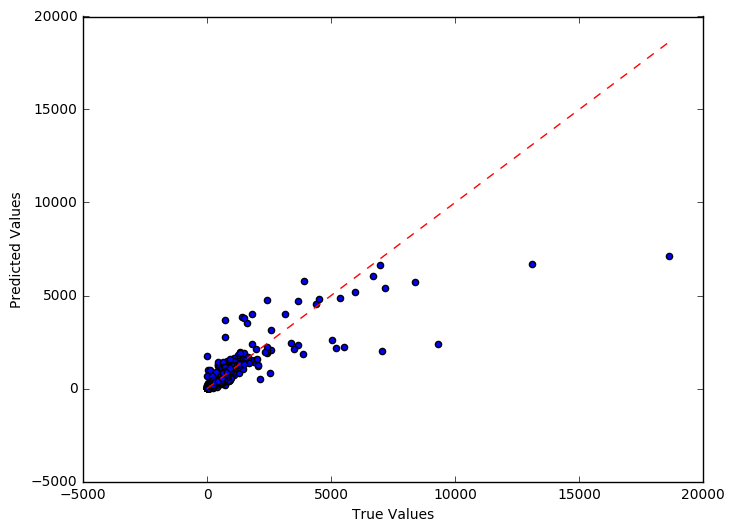

Dataset between 2/1 8:00am - 8:00pm in 5min
Best MSE is:  -2057072.40823
Best Parameters are:  {'max_depth': None, 'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4}


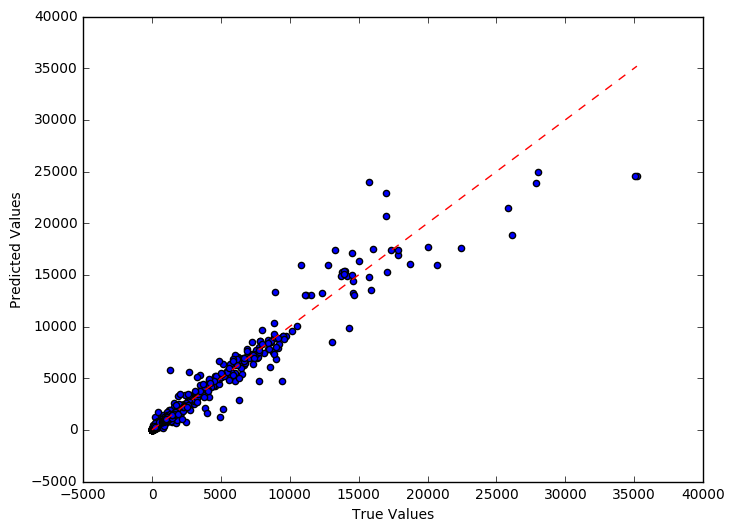

Dataset after 2/1 8:00pm in 1h
Best MSE is:  -133113.591483
Best Parameters are:  {'max_depth': 60, 'n_estimators': 400, 'min_samples_split': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2}


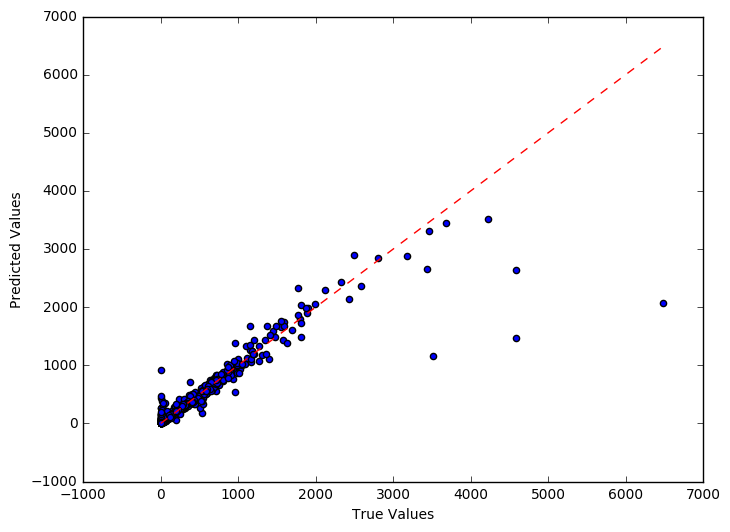

In [16]:
for i in range(3):
    X = date_df_out_win[i].iloc[:-1]
    y = date_df_out_win[i]['tot_num_tweets'][1:]
    X = np.nan_to_num(X)
    y = np.nan_to_num(y)
    
    rfr = GridSearchCV(RandomForestRegressor(), parameters, n_jobs=cv_n_jobs, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error')
    rfr.fit(X, y)
    predictResult = rfr.predict(X)

    # Print result
    # print(["%.6f" % x for x in rfr.cv_results_[r'mean_test_score']])
    print(windowTitles[i])
    print('Best MSE is: ',rfr.best_score_ )
    print('Best Parameters are: ',rfr.best_params_ )
    plotPred(y,predictResult)

#### Section 2. GradientBoostingRegressor ####

Dataset before 2/1 8:00am in 1h
Best MSE is:  -205462.020367
Best Parameters are:  {'max_depth': 80, 'n_estimators': 400, 'min_samples_split': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4}


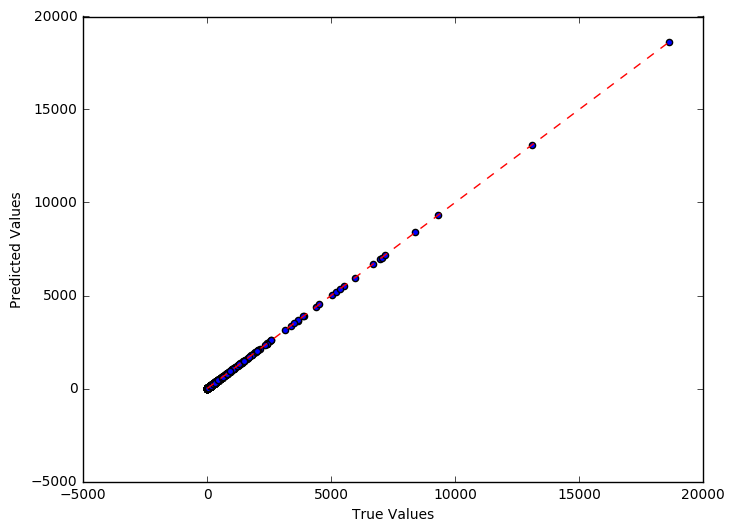

Dataset between 2/1 8:00am - 8:00pm in 5min
Best MSE is:  -2226593.3225
Best Parameters are:  {'max_depth': 200, 'n_estimators': 800, 'min_samples_split': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2}


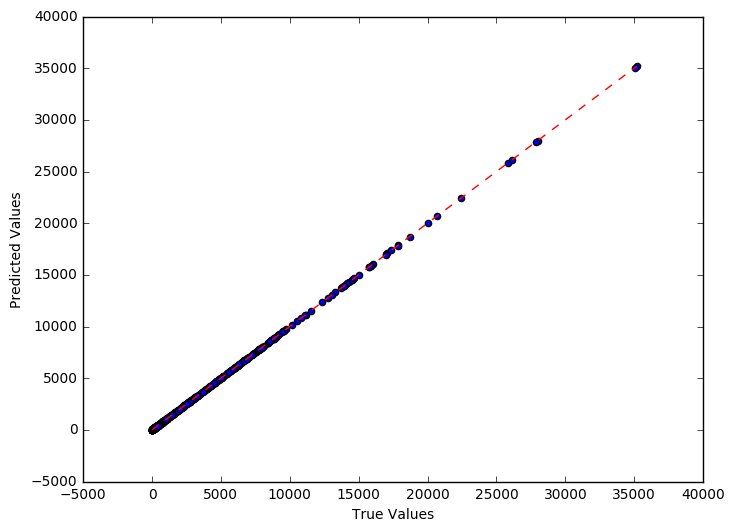

Dataset after 2/1 8:00pm in 1h
Best MSE is:  -137525.369129
Best Parameters are:  {'max_depth': 60, 'n_estimators': 1800, 'min_samples_split': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1}


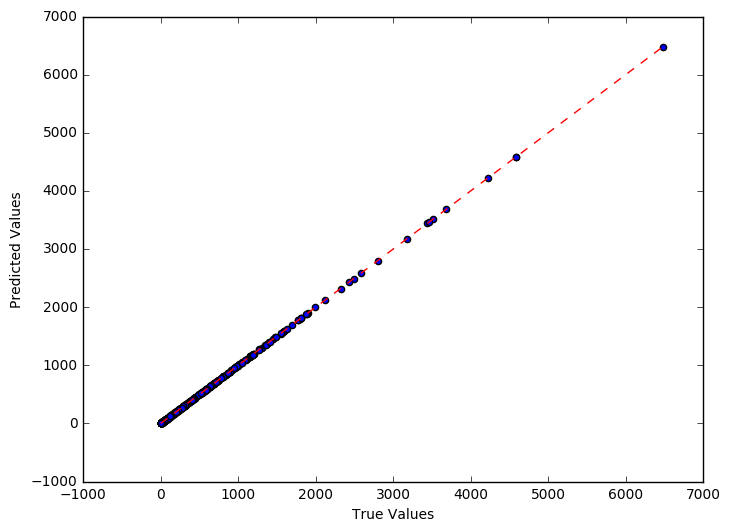

In [17]:
for i in range(3):
    X = date_df_out_win[i].iloc[:-1]
    y = date_df_out_win[i]['tot_num_tweets'][1:]
    X = np.nan_to_num(X)
    y = np.nan_to_num(y)

    gbr = GridSearchCV(GradientBoostingRegressor(), parameters, n_jobs=cv_n_jobs, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error')
    gbr.fit(X, y)
    predictResult = gbr.predict(X)

    # Print result
    # print(["%.6f" % x for x in gbr.cv_results_[r'mean_test_score']])
    print(windowTitles[i])
    print('Best MSE is: ',gbr.best_score_ )
    print('Best Parameters are: ',gbr.best_params_ )
    plotPred(y,predictResult)